In [20]:
# pip install bs4
# pip install beautifulsoup4
from bs4 import BeautifulSoup

In [21]:
# find() : 조건을 만족하는 태그 하나만 가져옴
ex1 = '''
    <html>
        <head>
            <title> HTML 연습 </title>
        </head>
        <body>
            <p align="center"> text1 </p>
            <img src="data:image/webp;base64,UklGRrITAABXRUJQVlA4IKYTAADwYQCdASriAJsAPsFSokynpKMirHgK2PAYCWVr74AFJc/IwP39mvcrJrR6H75MqWzZ21+3vCIRUe++HP8brtp4v/18v38F/6jWC38u0VkmwoFzD8r7PPlNwIxsrdbJ7VJ35IYQJDc7cPnNUR/VBQCKe27RxkR+jShYuxc7KUQmDa9XTLAkhJ8VgCkJ9BwqIHDuZPuvqr9plUiZdtMII84sfZp6jq+IYoiTUpLq5Syavig2Z/q3PnRcNgS9bZd2DomKyqpqlyMammiCW78n+sLZRFokxe1LIU+qqeLG5/V1uUyIISgtA8qQ/D5M4Q0E7RhoF9qbdG1lEq7wI9tme6+RsqvMg4r0ynrtK+FTddd+/3xcvKuX9j3fbCsjTLp/FSlDTFNiNQzNfku7kh4EuUg6JZrenojwPSZstMsHE5i1Z3x7ug0tp6gcu2oFknLX+nd5XkW6pxmSnyQME7SiV1TLcfRSvlaRaFerr8W0adWGWcMFBfhaTQylo2nmHDHln9ug3Bu2oR1Nop8HVsAHHjiUQplA45t9Mqo1IqPTD7erRwhrC2H623/KImigi58u97AAWHr2j5bJJtouOBLysi/GVfRhAuLtl4dUeXUMPTchYcETRIB6bynIdBN682s4lv/8cBtTBfCVKZDPnploHj3cGfLjtRx3kRkGkhxCxWCygmYWVswt6pHYSV7jWZgvmvtVZVnRtBSGmTTW4752qrWygFSp/CaTAbPmLiGphiMAwQEFJ1U4Nn65NbUCK+ggjVP46zk6LIIOs3OBF2L6poWVhMoFCCZc+TV9rBA1r16z3xiIqswX42KL3e7pOz87BNNwdV69wJAVvPy/wOEBl8zkZxS5jGJX0sUn+iq4hqaOSguVWugmWhTrxzzgZd536okxRlw+lv9VXjwr1Qc4WkzxPbH3YlwbFL7gqYLHiOxyAQecVOonwNwmANSEbB/spxd0B4fvF2RTM9jbOgCfkYraSWqWTSZFLhrSx74W362gQx9XznsfwtgT1RvWKcobklNIBLiGyFKMW9GQb/qnXYYX5fdkvI0lQAAA/u9GvP0CCH1j69XN4nKGVWi+gz6wPz/7yBRUZSlOLmTOmCrl8kXE1xHrEY86U7hrmuyOvijwpm6YJknOuI3CWJGvx3k5Jk0did05jsLbT5wSWZMdFOcp6zuQXcUe2MmzSzZcwCSzn2R0Qveatmgp09MzLKEKBLLYEPhW6nx1AmCSvPI4n931z1lWAQF9ZgDvMkgXIHbc3yxtpD9nesfixwr1kkVybSRKZ9VRWweZDeP+RViTN3jcRQY32zr3FiwTewQF8WWATAtMaBqvO+pAKjw6ih2exJUi1PA36RrxRQfJ+EEtvNJ/wACwUIFt3670TtvVMWSTTaXHLL5NosQbKX0MCo2cqSysw0nGVw/0uy9+7HfmyJ9sYp4kUFqjbS9WfEOuqlxl/hzii9sHBNKG8eMXixdc8rKW8WbO5CxpUVdt98F3MVthQYetUhqXYXAMPe1GLULUw0V9s6Vq5wBI36qFmVFuPxz3SONYHKtmmhLcSMW7tFor/qVOs0cTJb8GZ4y94ekwoBGPWWIGBXAeYPKWLW8epgfQcynW34g3t3R79A6ecYOKFX7QxkZ+zE3tn9bVM2Dtwha6ao/b2gFewO1PcdQjJch3vOwm4hK38IBJ/wBlTXKKaklC1/BWJrCrMMT4cYa5Kf23204qBStZQdQi/8MI5ix6oBhhykXc9XarCapPk5QVGBMOxewhkX8bDWUKufPgBAfwLnBcfYjN8o6HixDyCTGehVpPZFh6jOK8yNQruJKwA1ap8oq8TMtiTENlOGzDL2NCrkaUrbhsDmqtwBp/aXBwDzy8Gt6l5PBfmu3EaKX+7qtZvKo3hI251rH476XYjQA5pn+cszqC11aLohFQeJN/rj+oh4jkJ6EP1e6aen5NDoQUEH/u1ajAREvTrNVgAu/gHUggfOcDrrpLckGzt7g8Hrm+H7rZ+LWNNGD0CVgGYj60EsxxhaJKSs6PHAECGQZwsgEB6FMs4ze0kwVzk2/I2vKdWF+cZNmvyolvVG82znIgxKUJ4ggv+jjFaBQ8HOqJEyk95oTKsvg8AbHIbxS2TDDeFYp6HhEtoVqEYGqb21hZhcq+g8caDPzSZMCEdl3X0W9azxACkMUbvnlGViF55iojpyrvgY+YJmWu+VBUIqOsU4Qx1gD468MitjwR+aRA7d8QQ5H4BONNEPaeha0FHttsYTbBJZtghBVNCvolXGUwM1hnPhVAV9iJln8r9vUm1L+NSHeb0hk0wkqj86Fer4+9CDVwx4Pwfg9g/Lk1+bfWQld9S4GtmZIPchCwQgaqBuLbLUE0MJg77dXveSLoWlTAJlr3M8T9okNBHxkmGCENAgElLw9uPYAlZRL4GuaOXUYXrFPc8sal56Bi+70sdEkx2E1aUU9hTyaDoQiE5t/ND/DkW/1lUF03ZOcLlJo/UuV8hOdNMyTVGjRconup0Q9Wa7Jl4vwhiSfVRhklnuUzPwYoY/RvN8OA7DVeHk0oJhSKJNdYTLiULWTaSS4WtTyki4NSqkZ3IdiZwORf3llJug/S6kU3XODS0J+EHF0QlkdgIdkzXmfh2Fgryew/T6LzXnA17E46oJlAauRyAWE96z2oMHX2aocRX6sGPz6m5jpvl5qvgF5S9M24I5C5lua10Yoj7FvhAiwlu7AGLJroiSASbOULU+0AIRLzyE+wpJenLnfNSanB6b38ZY/7Fd37f3PeT+HQat3S96zKWkBmdZPq8v3jhxKGmTTmkCnRoFT2uNzsxMKYifHxGH1eKrAvy+XYDlLZFlCf4639IBM1yvAl0RcBm98KtQ56YzoUcKGn/FHnNzsvdXP0IxJPWYhRGiGPzFPuQk+tAkq3upZTxX5g0d/c9n55sowdS5Fs4qLx/7UtbgIJSdcJhnmi9YPjPkw8gRdICAnPqYCLBZU764nLu+yYUGJV6/EIYkTxbldmiLyDmoh/1d3KnZWdXzas5sLhH0861H7g9cR2h0WAWoT3p/6Dr5HgDsduqTXs9uI/KhcNJ+vzDBL/b9vOlDhNizlwH8yNTiBu/cTIPusM+BQyUnx6AF37FZfmqSbkJBAM5ugwvIl2PG7PNLUDRgk7quzWOIyB3g76E6eDre/tw7M8GrIyGognoXup/3HWZVtfWHDeV0BBgfa4kHfOfgZfu0y0EJL4MzWGJHFVCdClHjUCa+Vh7Kj0B4RcSmXH3cXHFUg9XYj/9IPwN2wyxIcaEwHtvVBs33gmft3NFQWdYYQnXCr9fYqV4WeRZ7RAdtbaWUXkJLNDtn+ObE0UKZzYWhxrYusxxoxeJAqJH4I8PETw82UrOztQZGUu6SNTfVYX614gzFkw35TPSNELxUiHBxFgrHdjFZDWejnSEW7iivAUk30qdZPs5IocmqCIvaepgGWZvWClLMUWQwzeV3zJdDLvuFBfTCfVLWSaMQ2SG4Ff86Y1BDrJW0gjEUrqMlqS0ajIVYbVLJMX8o52qGWvuXX77qyWBvczy+Zlg5JsnJ/TmsKRIScDgU7zm5hu+9TWdOK4rQSeid7aM8CXwsSgtUlqyPx4CmUV9KX9ZztJ+reiEn1l5xgZpam05ADnIY4U+6E9IkfWB/uR/ZVrBufhssoQGN61ovq+ERUs2uu4QJVU77e662fOFZ6BznEXFu7ShGvt8/qT6pkVjyRWAX2FgL5781ctl1kXmeh2BHU4VHTDzsLJQXwHh36C9k9LG4o5VDYmdjKM0w8b3L6WCOyISfiX5Ml0K13ZVpOkz8+4FoDhPdh0UMJmJbjFHRLjpKc5VzghWn/iA4rp9RWmK5a7OX3Ul7DlOSsXERLQ7h9WRhsps/15H7UStn8N+1Hu7jyTtx0bA84HSxvS//naHqNujTv1Qz/E83hSu6Y8rqKkCCBAEPAwi2BVZadyuAW43EKZIIq1/Syag8OPtnG4PbDCj8qEkFMppKFzrMIMSAFn1328e2lwzmtZ8ZYe9V4PpZwgf+5EMuw4wZdnHnGvE2YjpQ6sze8Sgc1jMKDWnMvidLGESQAN3g6dk4H1sMukyfU7CxjXrUu02G5CGJPIH8cJAIQO9asFxRWWpcDEPvaEwnfPgzEzo0TudldSNbo50ZU/6wM8v5kuB/n0vyRD5zLWIi1ZYZk2N8OV1npsJTlxWStO/tig+kp4kt6kWwrJ5VM0tLCZkGi4BsMjHBqHCa60MhAYAFIM2/KWEm1qFOPBRvocK/Qa7zXthJsdET3FCmJHrxVNDW73sis5reLYKgVmHVF1BkKegAkjpYpAaQcpyXX8FIlxkBVKhq7o32ZeYf5YOGWTEy9S/xsyvThdlvo0VExynQZat77p9t2nHSSbz+ybLazORzXMiqHuuU70cmhP2Nz0sg5OztwTjv/GJc/RUMxPbJnvuZENHegA+o56fszX08oYMmfT+5C+pCjacZWfA5dmwU9Pm9MelrhvhKpZrg+ZWZQkZLjxU8p57/Rl2sA+b2EgwLUefzHhtMLGfAH5axmanQioem9PD9ODOiJ0xl87gDAM+QH6li5F2NvRj4zZk6qxsmOka27jNtkJAOglhOEdAB/PBuMKyDKZ5S/G9IgkzaYf8/X3mE+a5hjv4/jE1DyFZkNISgMu5Ll7Xp6rrHHx4kL/ggV/AtCZ8QfF0YDESnyPxiAxaJ87/mY5KOeLvnqqkGejbTIhKJIsezdSSlWZ8icuopTqu5mZTBIqp0WO2VK/5u/nwyJPFxUw8NuREFnIOqHFxcZBkZ3hy5XV35+DhjOPDPdrusNDcWNzfnKpkV3pxOFjyEBv8nU8+mUGTFxwBjYMByZ3ne1dKo/vY2ERnp2DpkJY28/aHlmFQwzBp6D0RSaZkdpJhK0tJpvqDpTsQNpOErcvMtvj2UVc5U8+fKhI3MzSCt/VSYiegMN39Ff+D6v/Az0GcjHvaics4yKDF/yWKKwQMT4n5mJMSBdoAdKl187ka1lCmh9oPLtgOays768i4l996f4p+d+tYbpOW3V+o79+FfmoR0tYzWykIY5Yjrks5Q50fPUAD9dhotefELQlD/F2LrFM5IWRFqHAdq7bKBeNOId4c0xtppFFxTlwjFqeZpWRXLLGlsRVssYd62ogQyiXedfhGSflnlKV/9bdfOLTD7xKzrnE5imSstNfNw/CdqayRTEaXtfAcmsNI1s44CNcc6dNzQDrxkOxgZs4VguQBxxR1Qh6hWOofz0B4iYStKfuGm61x8s3JTut/hl47dUoYGMxUms1nKZj87ywuRWuRfTRJwZKgO+itWJoeizjyqM9Bue7oRX4Lg7FO2m+Aj7NgdtJGgoQxlSCGy+EkCeoFXOg9Kzd6u10vi73kbmOkRXblWK28nSS8a009tlwrV8SRtCGxx0AUD97ERrOFGC6CUBoFE5ePskVVhyWKeAooFkMJHV4Y3YADEmdmjUrVCNN62MvZugkxu0QObB6m3r6o1FxPOwpv++2KPpO1zylh42eIKEG76eoO9HUeLhuQiESM2+JaV4xk0fjvcgc9tMi6ZFws3DYeWvAyAabete0ocrmROCZerDvOk+1DWtuCMID96HpUxUWiTjfxVgkStzJEA6CTErVEdodMleZvMwK0OQBEVSGmXWvIovQKWBVu9ahaqovgo9cw6L/s/81yhQPJqW0f0mKdJxxxE1DqYtfcs22AY2EsVziG1HKDJUvHoDbLpsxHYXlCkemR5uzBHzYAoiXurF2eOWJm1N16XpDsHfWStgjLKJn8VKVCQpvA8lX7Gtsv0fnZ5JVfklY6zFDnrrFAt6q2mp9VkihC/I4A05IinG+7gNT7+hewWSPk5NA1J5D8JdN/08osO1vBXdROPlnxYMi0uLyY7FDmfBBdZDtlMRkGz6TJmtFbvgKl+7GGgneTBjUdPhTNw3Qd4WlRnP9iJCq6fomcWPwpNxTM6agm6taR93nMGwapf2MA7mVDzvrOHgNby3rAiCqg7W2JY3yv8yUOsbYQbV+cX+Knl9SVns/YJioRim3DetiCBsO6lBNjyUhpgTSlppIYSuwQAQEz+rUNiCuCO2n+XANjkWqcciiZ7gdGL7v0bXgGAEazKqU8c/KlvPzOM/nOM73v5trH1qTeZcoVAMmr7Qr3UkITjbfL/lDcIFn24JkV6VgD3H4dNgljruCDzVBvtTb34O2xxpgJRo+KnzQa5hguDGZvF3pZrNZ1635AVMbzk1yHquc7G2ZOWlDGSVF/bpRsKFpQsKgGaCTvFed6H4ml2cEql79TrPX+HN2ka0lOazLM+9fXMywJdtrIqRZfM5j3XHRHlBs2u8DSFeUr0zWDZnLe79odd9dXjR9N3440w1Na0gpqt8Obo/RcvSwGpxRuh2YF/bM8BOF6T4ERbK5JY3qLrf7NcMUohFf3LH6lBU+6II7OPaL5W6zA0opL5oYoYwYuvzRYxaX1ncOFKawY0wbVGz9iBSuY+7RohhYNwbtzWy9Ehlv682LtuY3cQ2ZV0hyoHTIFkoXn5On8Stk6uUZAOEPPs4+PTFKmzqCpg+NkYXh45Js6L4qp16p/AcSMei4yUofCpoJ8YxzuejCIi0+Y4ZxH/xep0cT1ccjlIH03kiIdLBO6BZb6M5BZUqqTgpSb+JoLsQvQf5yo3ns9aaVwclFsJkiPNCuzGhe1DOwf+5Xhw9xPF9RLCPCe3qgG5fEklIAAA==">
        </body>
    </html>'''

soup = BeautifulSoup(ex1, 'html.parser')
soup.find('title')
soup.find('p')
soup.find('p', align='center')

<p align="center"> text1 </p>

<p align="center"> text1 </p>
<p align="center"> text2 </p>
<p align="center"> text3 </p>

 text1 
 text1 
 text1 
 text2 
 text2 
 text2 
 text3 
 text3 
 text3 

None


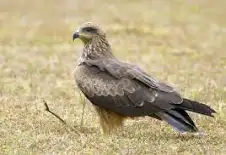

In [22]:
# find_all() : 해당 태그가 여러 개 있을 경우 한꺼번에 모두 가져옴
ex2 = '''
    <html>
        <head>
            <title> HTML 연습 </title>
        </head>
        <body>
            <p align="center"> text1 </p>
            <p align="center"> text2 </p>
            <p align="center"> text3 </p>
            <img src="data:image/webp;base64,UklGRrITAABXRUJQVlA4IKYTAADwYQCdASriAJsAPsFSokynpKMirHgK2PAYCWVr74AFJc/IwP39mvcrJrR6H75MqWzZ21+3vCIRUe++HP8brtp4v/18v38F/6jWC38u0VkmwoFzD8r7PPlNwIxsrdbJ7VJ35IYQJDc7cPnNUR/VBQCKe27RxkR+jShYuxc7KUQmDa9XTLAkhJ8VgCkJ9BwqIHDuZPuvqr9plUiZdtMII84sfZp6jq+IYoiTUpLq5Syavig2Z/q3PnRcNgS9bZd2DomKyqpqlyMammiCW78n+sLZRFokxe1LIU+qqeLG5/V1uUyIISgtA8qQ/D5M4Q0E7RhoF9qbdG1lEq7wI9tme6+RsqvMg4r0ynrtK+FTddd+/3xcvKuX9j3fbCsjTLp/FSlDTFNiNQzNfku7kh4EuUg6JZrenojwPSZstMsHE5i1Z3x7ug0tp6gcu2oFknLX+nd5XkW6pxmSnyQME7SiV1TLcfRSvlaRaFerr8W0adWGWcMFBfhaTQylo2nmHDHln9ug3Bu2oR1Nop8HVsAHHjiUQplA45t9Mqo1IqPTD7erRwhrC2H623/KImigi58u97AAWHr2j5bJJtouOBLysi/GVfRhAuLtl4dUeXUMPTchYcETRIB6bynIdBN682s4lv/8cBtTBfCVKZDPnploHj3cGfLjtRx3kRkGkhxCxWCygmYWVswt6pHYSV7jWZgvmvtVZVnRtBSGmTTW4752qrWygFSp/CaTAbPmLiGphiMAwQEFJ1U4Nn65NbUCK+ggjVP46zk6LIIOs3OBF2L6poWVhMoFCCZc+TV9rBA1r16z3xiIqswX42KL3e7pOz87BNNwdV69wJAVvPy/wOEBl8zkZxS5jGJX0sUn+iq4hqaOSguVWugmWhTrxzzgZd536okxRlw+lv9VXjwr1Qc4WkzxPbH3YlwbFL7gqYLHiOxyAQecVOonwNwmANSEbB/spxd0B4fvF2RTM9jbOgCfkYraSWqWTSZFLhrSx74W362gQx9XznsfwtgT1RvWKcobklNIBLiGyFKMW9GQb/qnXYYX5fdkvI0lQAAA/u9GvP0CCH1j69XN4nKGVWi+gz6wPz/7yBRUZSlOLmTOmCrl8kXE1xHrEY86U7hrmuyOvijwpm6YJknOuI3CWJGvx3k5Jk0did05jsLbT5wSWZMdFOcp6zuQXcUe2MmzSzZcwCSzn2R0Qveatmgp09MzLKEKBLLYEPhW6nx1AmCSvPI4n931z1lWAQF9ZgDvMkgXIHbc3yxtpD9nesfixwr1kkVybSRKZ9VRWweZDeP+RViTN3jcRQY32zr3FiwTewQF8WWATAtMaBqvO+pAKjw6ih2exJUi1PA36RrxRQfJ+EEtvNJ/wACwUIFt3670TtvVMWSTTaXHLL5NosQbKX0MCo2cqSysw0nGVw/0uy9+7HfmyJ9sYp4kUFqjbS9WfEOuqlxl/hzii9sHBNKG8eMXixdc8rKW8WbO5CxpUVdt98F3MVthQYetUhqXYXAMPe1GLULUw0V9s6Vq5wBI36qFmVFuPxz3SONYHKtmmhLcSMW7tFor/qVOs0cTJb8GZ4y94ekwoBGPWWIGBXAeYPKWLW8epgfQcynW34g3t3R79A6ecYOKFX7QxkZ+zE3tn9bVM2Dtwha6ao/b2gFewO1PcdQjJch3vOwm4hK38IBJ/wBlTXKKaklC1/BWJrCrMMT4cYa5Kf23204qBStZQdQi/8MI5ix6oBhhykXc9XarCapPk5QVGBMOxewhkX8bDWUKufPgBAfwLnBcfYjN8o6HixDyCTGehVpPZFh6jOK8yNQruJKwA1ap8oq8TMtiTENlOGzDL2NCrkaUrbhsDmqtwBp/aXBwDzy8Gt6l5PBfmu3EaKX+7qtZvKo3hI251rH476XYjQA5pn+cszqC11aLohFQeJN/rj+oh4jkJ6EP1e6aen5NDoQUEH/u1ajAREvTrNVgAu/gHUggfOcDrrpLckGzt7g8Hrm+H7rZ+LWNNGD0CVgGYj60EsxxhaJKSs6PHAECGQZwsgEB6FMs4ze0kwVzk2/I2vKdWF+cZNmvyolvVG82znIgxKUJ4ggv+jjFaBQ8HOqJEyk95oTKsvg8AbHIbxS2TDDeFYp6HhEtoVqEYGqb21hZhcq+g8caDPzSZMCEdl3X0W9azxACkMUbvnlGViF55iojpyrvgY+YJmWu+VBUIqOsU4Qx1gD468MitjwR+aRA7d8QQ5H4BONNEPaeha0FHttsYTbBJZtghBVNCvolXGUwM1hnPhVAV9iJln8r9vUm1L+NSHeb0hk0wkqj86Fer4+9CDVwx4Pwfg9g/Lk1+bfWQld9S4GtmZIPchCwQgaqBuLbLUE0MJg77dXveSLoWlTAJlr3M8T9okNBHxkmGCENAgElLw9uPYAlZRL4GuaOXUYXrFPc8sal56Bi+70sdEkx2E1aUU9hTyaDoQiE5t/ND/DkW/1lUF03ZOcLlJo/UuV8hOdNMyTVGjRconup0Q9Wa7Jl4vwhiSfVRhklnuUzPwYoY/RvN8OA7DVeHk0oJhSKJNdYTLiULWTaSS4WtTyki4NSqkZ3IdiZwORf3llJug/S6kU3XODS0J+EHF0QlkdgIdkzXmfh2Fgryew/T6LzXnA17E46oJlAauRyAWE96z2oMHX2aocRX6sGPz6m5jpvl5qvgF5S9M24I5C5lua10Yoj7FvhAiwlu7AGLJroiSASbOULU+0AIRLzyE+wpJenLnfNSanB6b38ZY/7Fd37f3PeT+HQat3S96zKWkBmdZPq8v3jhxKGmTTmkCnRoFT2uNzsxMKYifHxGH1eKrAvy+XYDlLZFlCf4639IBM1yvAl0RcBm98KtQ56YzoUcKGn/FHnNzsvdXP0IxJPWYhRGiGPzFPuQk+tAkq3upZTxX5g0d/c9n55sowdS5Fs4qLx/7UtbgIJSdcJhnmi9YPjPkw8gRdICAnPqYCLBZU764nLu+yYUGJV6/EIYkTxbldmiLyDmoh/1d3KnZWdXzas5sLhH0861H7g9cR2h0WAWoT3p/6Dr5HgDsduqTXs9uI/KhcNJ+vzDBL/b9vOlDhNizlwH8yNTiBu/cTIPusM+BQyUnx6AF37FZfmqSbkJBAM5ugwvIl2PG7PNLUDRgk7quzWOIyB3g76E6eDre/tw7M8GrIyGognoXup/3HWZVtfWHDeV0BBgfa4kHfOfgZfu0y0EJL4MzWGJHFVCdClHjUCa+Vh7Kj0B4RcSmXH3cXHFUg9XYj/9IPwN2wyxIcaEwHtvVBs33gmft3NFQWdYYQnXCr9fYqV4WeRZ7RAdtbaWUXkJLNDtn+ObE0UKZzYWhxrYusxxoxeJAqJH4I8PETw82UrOztQZGUu6SNTfVYX614gzFkw35TPSNELxUiHBxFgrHdjFZDWejnSEW7iivAUk30qdZPs5IocmqCIvaepgGWZvWClLMUWQwzeV3zJdDLvuFBfTCfVLWSaMQ2SG4Ff86Y1BDrJW0gjEUrqMlqS0ajIVYbVLJMX8o52qGWvuXX77qyWBvczy+Zlg5JsnJ/TmsKRIScDgU7zm5hu+9TWdOK4rQSeid7aM8CXwsSgtUlqyPx4CmUV9KX9ZztJ+reiEn1l5xgZpam05ADnIY4U+6E9IkfWB/uR/ZVrBufhssoQGN61ovq+ERUs2uu4QJVU77e662fOFZ6BznEXFu7ShGvt8/qT6pkVjyRWAX2FgL5781ctl1kXmeh2BHU4VHTDzsLJQXwHh36C9k9LG4o5VDYmdjKM0w8b3L6WCOyISfiX5Ml0K13ZVpOkz8+4FoDhPdh0UMJmJbjFHRLjpKc5VzghWn/iA4rp9RWmK5a7OX3Ul7DlOSsXERLQ7h9WRhsps/15H7UStn8N+1Hu7jyTtx0bA84HSxvS//naHqNujTv1Qz/E83hSu6Y8rqKkCCBAEPAwi2BVZadyuAW43EKZIIq1/Syag8OPtnG4PbDCj8qEkFMppKFzrMIMSAFn1328e2lwzmtZ8ZYe9V4PpZwgf+5EMuw4wZdnHnGvE2YjpQ6sze8Sgc1jMKDWnMvidLGESQAN3g6dk4H1sMukyfU7CxjXrUu02G5CGJPIH8cJAIQO9asFxRWWpcDEPvaEwnfPgzEzo0TudldSNbo50ZU/6wM8v5kuB/n0vyRD5zLWIi1ZYZk2N8OV1npsJTlxWStO/tig+kp4kt6kWwrJ5VM0tLCZkGi4BsMjHBqHCa60MhAYAFIM2/KWEm1qFOPBRvocK/Qa7zXthJsdET3FCmJHrxVNDW73sis5reLYKgVmHVF1BkKegAkjpYpAaQcpyXX8FIlxkBVKhq7o32ZeYf5YOGWTEy9S/xsyvThdlvo0VExynQZat77p9t2nHSSbz+ybLazORzXMiqHuuU70cmhP2Nz0sg5OztwTjv/GJc/RUMxPbJnvuZENHegA+o56fszX08oYMmfT+5C+pCjacZWfA5dmwU9Pm9MelrhvhKpZrg+ZWZQkZLjxU8p57/Rl2sA+b2EgwLUefzHhtMLGfAH5axmanQioem9PD9ODOiJ0xl87gDAM+QH6li5F2NvRj4zZk6qxsmOka27jNtkJAOglhOEdAB/PBuMKyDKZ5S/G9IgkzaYf8/X3mE+a5hjv4/jE1DyFZkNISgMu5Ll7Xp6rrHHx4kL/ggV/AtCZ8QfF0YDESnyPxiAxaJ87/mY5KOeLvnqqkGejbTIhKJIsezdSSlWZ8icuopTqu5mZTBIqp0WO2VK/5u/nwyJPFxUw8NuREFnIOqHFxcZBkZ3hy5XV35+DhjOPDPdrusNDcWNzfnKpkV3pxOFjyEBv8nU8+mUGTFxwBjYMByZ3ne1dKo/vY2ERnp2DpkJY28/aHlmFQwzBp6D0RSaZkdpJhK0tJpvqDpTsQNpOErcvMtvj2UVc5U8+fKhI3MzSCt/VSYiegMN39Ff+D6v/Az0GcjHvaics4yKDF/yWKKwQMT4n5mJMSBdoAdKl187ka1lCmh9oPLtgOays768i4l996f4p+d+tYbpOW3V+o79+FfmoR0tYzWykIY5Yjrks5Q50fPUAD9dhotefELQlD/F2LrFM5IWRFqHAdq7bKBeNOId4c0xtppFFxTlwjFqeZpWRXLLGlsRVssYd62ogQyiXedfhGSflnlKV/9bdfOLTD7xKzrnE5imSstNfNw/CdqayRTEaXtfAcmsNI1s44CNcc6dNzQDrxkOxgZs4VguQBxxR1Qh6hWOofz0B4iYStKfuGm61x8s3JTut/hl47dUoYGMxUms1nKZj87ywuRWuRfTRJwZKgO+itWJoeizjyqM9Bue7oRX4Lg7FO2m+Aj7NgdtJGgoQxlSCGy+EkCeoFXOg9Kzd6u10vi73kbmOkRXblWK28nSS8a009tlwrV8SRtCGxx0AUD97ERrOFGC6CUBoFE5ePskVVhyWKeAooFkMJHV4Y3YADEmdmjUrVCNN62MvZugkxu0QObB6m3r6o1FxPOwpv++2KPpO1zylh42eIKEG76eoO9HUeLhuQiESM2+JaV4xk0fjvcgc9tMi6ZFws3DYeWvAyAabete0ocrmROCZerDvOk+1DWtuCMID96HpUxUWiTjfxVgkStzJEA6CTErVEdodMleZvMwK0OQBEVSGmXWvIovQKWBVu9ahaqovgo9cw6L/s/81yhQPJqW0f0mKdJxxxE1DqYtfcs22AY2EsVziG1HKDJUvHoDbLpsxHYXlCkemR5uzBHzYAoiXurF2eOWJm1N16XpDsHfWStgjLKJn8VKVCQpvA8lX7Gtsv0fnZ5JVfklY6zFDnrrFAt6q2mp9VkihC/I4A05IinG+7gNT7+hewWSPk5NA1J5D8JdN/08osO1vBXdROPlnxYMi0uLyY7FDmfBBdZDtlMRkGz6TJmtFbvgKl+7GGgneTBjUdPhTNw3Qd4WlRnP9iJCq6fomcWPwpNxTM6agm6taR93nMGwapf2MA7mVDzvrOHgNby3rAiCqg7W2JY3yv8yUOsbYQbV+cX+Knl9SVns/YJioRim3DetiCBsO6lBNjyUhpgTSlppIYSuwQAQEz+rUNiCuCO2n+XANjkWqcciiZ7gdGL7v0bXgGAEazKqU8c/KlvPzOM/nOM73v5trH1qTeZcoVAMmr7Qr3UkITjbfL/lDcIFn24JkV6VgD3H4dNgljruCDzVBvtTb34O2xxpgJRo+KnzQa5hguDGZvF3pZrNZ1635AVMbzk1yHquc7G2ZOWlDGSVF/bpRsKFpQsKgGaCTvFed6H4ml2cEql79TrPX+HN2ka0lOazLM+9fXMywJdtrIqRZfM5j3XHRHlBs2u8DSFeUr0zWDZnLe79odd9dXjR9N3440w1Na0gpqt8Obo/RcvSwGpxRuh2YF/bM8BOF6T4ERbK5JY3qLrf7NcMUohFf3LH6lBU+6II7OPaL5W6zA0opL5oYoYwYuvzRYxaX1ncOFKawY0wbVGz9iBSuY+7RohhYNwbtzWy9Ehlv682LtuY3cQ2ZV0hyoHTIFkoXn5On8Stk6uUZAOEPPs4+PTFKmzqCpg+NkYXh45Js6L4qp16p/AcSMei4yUofCpoJ8YxzuejCIi0+Y4ZxH/xep0cT1ccjlIH03kiIdLBO6BZb6M5BZUqqTgpSb+JoLsQvQf5yo3ns9aaVwclFsJkiPNCuzGhe1DOwf+5Xhw9xPF9RLCPCe3qgG5fEklIAAA=="/>
        </body>
    </html>'''

soup = BeautifulSoup(ex2, 'html.parser')
items = soup.find_all('p')
items = soup.find_all(['p', 'img'])
for item in items:
    print(item)
for item in items:
    print(item.text)
    print(item.string)
    print(item.get_text())

In [23]:
# css_selector : select()

# soup.select('태그이름')
# soup.select('상위태그 > 하위태그 > 하위태그')
soup.select('div > p > span')[0]
soup.select('div > p > span')[1]
soup.select('div > p > span')[2]

# soup.select('.클래스명')
# soup.select('상위태그.클래스명 > 하위태그.클래스명')
soup.select('p.name1 > span.store')

# soup.select('#아이디명')
# soup.select('#아이디명 > 태그명.클래스명')
# soup.select('태그명[속성1=값]')
soup.select('p[href]')



IndexError: list index out of range